In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import *

### Variablen

In [3]:
today = date.today()
ts = pd.to_datetime('2021-08-01', utc=True)

### Daten einlesen

In [4]:
pfad = "D:\\Github\\Auswertung_Covid_19\\input\\data-ovyiI.csv"

In [5]:
df_divi = pd.read_csv(pfad)
df_divi["date"] = pd.to_datetime(df_divi["date"], utc=True)
df_divi['date'] = pd.to_datetime(df_divi['date']).dt.date

# Datum Filter
df_divi = df_divi.loc[df_divi.date >= ts, :]
df_divi = df_divi.rename(columns={'COVID-19-Fälle':'DIVI'})

df_divi.head(3)

,date,DIVI
499,2021-08-01,360
500,2021-08-02,374
501,2021-08-03,375


In [6]:
df_who = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")

In [7]:
# data cleaning
df_who = df_who.drop(columns=['Country_code', 'WHO_region'])
df_who = df_who[df_who.New_cases != 0]

In [8]:
# Datentyp
df_who['Date_reported'] = pd.to_datetime(df_who['Date_reported'], utc=True)
df_who['Date_reported'] = pd.to_datetime(df_who['Date_reported']).dt.date
# Filter Datum
df_who = df_who.loc[df_who.Date_reported >= ts, :]
# Filter Land
df_who = df_who.loc[df_who.Country == "Germany"]
df_who.head(3)

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
56342,2021-08-01,Germany,2097,3771262,1,91659
56343,2021-08-02,Germany,847,3772109,1,91660
56344,2021-08-03,Germany,1766,3773875,19,91679


In [9]:
df_who = df_who.rename(columns={'Date_reported':'date'})
df_who.head(3)

,date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
56342,2021-08-01,Germany,2097,3771262,1,91659
56343,2021-08-02,Germany,847,3772109,1,91660
56344,2021-08-03,Germany,1766,3773875,19,91679


In [10]:
df_merge = df_who.merge(df_divi, on="date", how="left")
df_merge.head(3)

,date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,DIVI
0,2021-08-01,Germany,2097,3771262,1,91659,360
1,2021-08-02,Germany,847,3772109,1,91660,374
2,2021-08-03,Germany,1766,3773875,19,91679,375


In [11]:
df_merge['MA'] = df_merge['New_cases'].rolling(window=7, min_periods=1).mean()
df_merge['MA_d'] = df_merge['New_deaths'].rolling(window=7, min_periods=1).mean()
case_fatality = str(round( 100 * (df_merge["MA_d"].iloc[-1] / df_merge["MA"].iloc[-20]),1 ))
df_merge.head(3)

,date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,DIVI,MA,MA_d
0,2021-08-01,Germany,2097,3771262,1,91659,360,2097.0,1.0
1,2021-08-02,Germany,847,3772109,1,91660,374,1472.0,1.0
2,2021-08-03,Germany,1766,3773875,19,91679,375,1570.0,7.0


### Rechnen

In [12]:
MA_max = df_merge['MA'].max()
MA_d_max = df_merge['MA_d'].max()
divi_max = df_merge['DIVI'].max()
print(MA_max)
print(MA_d_max)
print(divi_max)

58107.71428571428
386.7142857142857
4918


In [13]:
df_merge['cases'] = 100 * (df_merge['MA'] / MA_max)
df_merge['deaths'] = 100 * (df_merge['MA_d'] / MA_d_max)
df_merge['divi'] = 100 * (df_merge['DIVI'] / divi_max)

# df_merge = df_merge.drop(columns=['New_cases', 'New_deaths', 'COVID-19-Fälle', 'MA', 'MA_d'])
df = df_merge
df.head(3)

,date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,DIVI,MA,MA_d,cases,deaths,divi
0,2021-08-01,Germany,2097,3771262,1,91659,360,2097.0,1.0,3.608815,0.258589,7.320049
1,2021-08-02,Germany,847,3772109,1,91660,374,1472.0,1.0,2.533226,0.258589,7.604717
2,2021-08-03,Germany,1766,3773875,19,91679,375,1570.0,7.0,2.701879,1.810122,7.625051


### Visualisierung

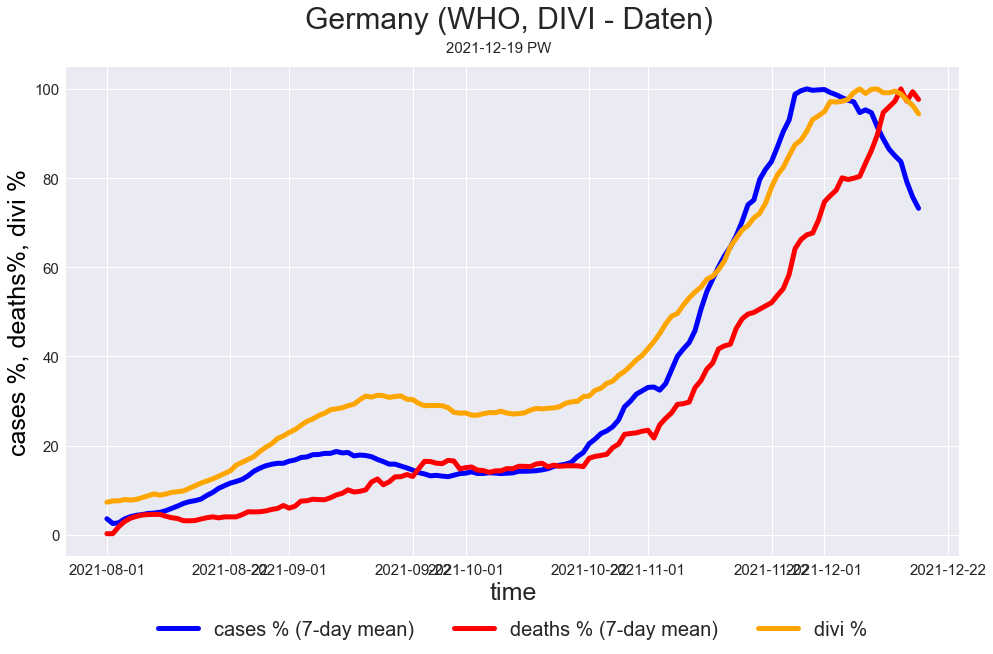

In [14]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(16, 9))
# formatter = FuncFormatter(y_axis_thousands)
# ax.yaxis.set_major_formatter(formatter)

plt.plot(df.date, df['cases'], color="blue", marker="", linestyle="solid", label="cases % (7-day mean)",
         linewidth=5)
plt.plot(df.date, df['deaths'], color="red", marker="", linestyle="solid", label="deaths % (7-day mean)",
         linewidth=5)
plt.plot(df.date, df['divi'], color="orange", marker="", linestyle="solid", label="divi %",
         linewidth=5)
ax.set_xlabel("time", fontsize=25)
ax.set_ylabel("cases %, deaths%, divi %", color="black", fontsize=25)

ax.tick_params(labelsize=15)

plt.legend(loc='center',
           bbox_to_anchor=(0.5, -0.15),
           fancybox=True,
           shadow=True,
           ncol=3,
           fontsize=20)

plt.title(f'Germany (WHO, DIVI - Daten) \n', fontsize=30)

plt.suptitle(f'{today} PW',
             fontsize=15, y=0.92)
plt.savefig("D:\\Github\\Auswertung_Covid_19\\Output\\who_divi.png", dpi=200, bbox_inches='tight')

In [15]:
df

,date,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,DIVI,MA,MA_d,cases,deaths,divi
0,2021-08-01,Germany,2097,3771262,1,91659,360,2097.000000,1.000000,3.608815,0.258589,7.320049
1,2021-08-02,Germany,847,3772109,1,91660,374,1472.000000,1.000000,2.533226,0.258589,7.604717
2,2021-08-03,Germany,1766,3773875,19,91679,375,1570.000000,7.000000,2.701879,1.810122,7.625051
3,2021-08-04,Germany,3571,3777446,25,91704,389,2070.250000,11.500000,3.562780,2.973772,7.909719
4,2021-08-05,Germany,3539,3780985,26,91730,384,2364.000000,14.400000,4.068307,3.723679,7.808052
...,...,...,...,...,...,...,...,...,...,...,...,...
134,2021-12-13,Germany,21743,6531606,116,105754,4894,49377.857143,376.142857,84.976423,97.266347,99.511997
135,2021-12-14,Germany,30823,6562429,473,106227,4862,48629.857143,386.714286,83.689159,100.000000,98.861326
136,2021-12-15,Germany,51301,6613730,453,106680,4792,46015.571429,376.142857,79.190125,97.266347,97.437983
137,2021-12-16,Germany,56677,6670407,522,107202,4736,44025.000000,384.285714,75.764467,99.371999,96.299309


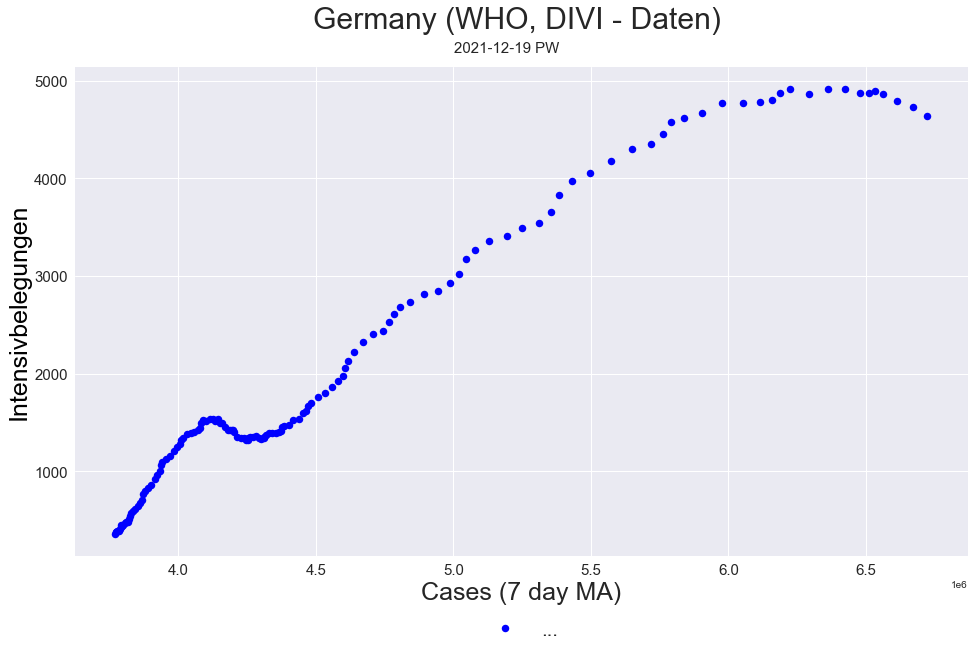

In [16]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(16, 9))
# formatter = FuncFormatter(y_axis_thousands)
# ax.yaxis.set_major_formatter(formatter)

plt.plot(df['Cumulative_cases'], df['DIVI'], color="blue", marker=".", markersize=15, linestyle="", label="...",
         linewidth=5)
# plt.plot(df.date, df['deaths'], color="red", marker="", linestyle="solid", label="deaths % (7-day mean)",
#          linewidth=5)
# plt.plot(df.date, df['divi'], color="orange", marker="", linestyle="solid", label="divi %",
#          linewidth=5)
ax.set_xlabel("Cases (7 day MA)", fontsize=25)
ax.set_ylabel("Intensivbelegungen", color="black", fontsize=25)

ax.tick_params(labelsize=15)

plt.legend(loc='center',
           bbox_to_anchor=(0.5, -0.15),
           fancybox=True,
           shadow=True,
           ncol=3,
           fontsize=20)

plt.title(f'Germany (WHO, DIVI - Daten) \n', fontsize=30)

plt.suptitle(f'{today} PW',
             fontsize=15, y=0.92)
plt.savefig("D:\\Github\\Auswertung_Covid_19\\Output\\who_divi2.png", dpi=200, bbox_inches='tight')

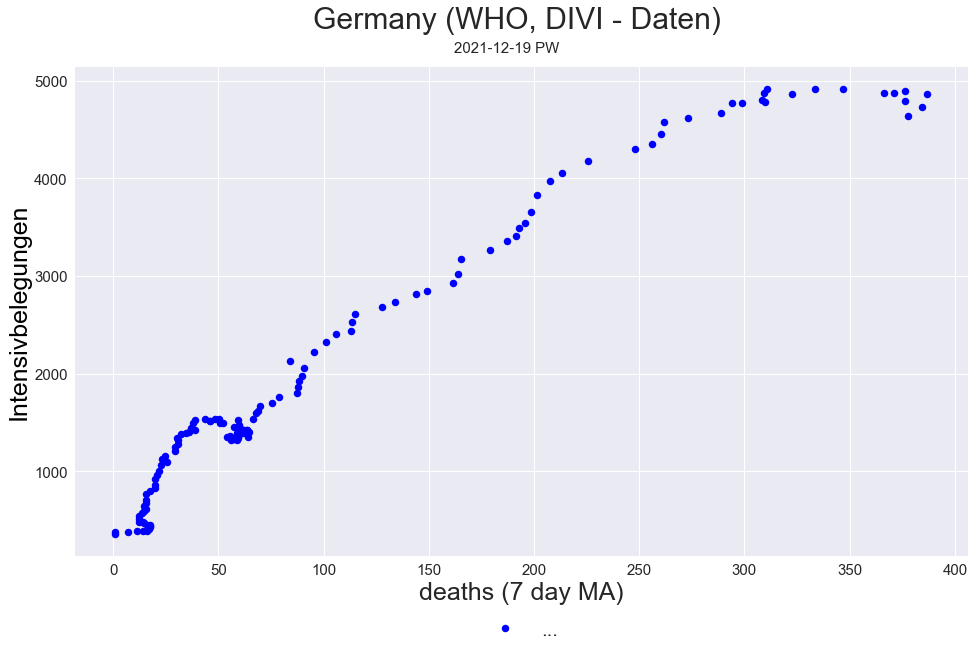

In [17]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(16, 9))
# formatter = FuncFormatter(y_axis_thousands)
# ax.yaxis.set_major_formatter(formatter)

plt.plot(df['MA_d'], df['DIVI'], color="blue", marker=".", markersize=15, linestyle="", label="...",
         linewidth=5)
# plt.plot(df.date, df['deaths'], color="red", marker="", linestyle="solid", label="deaths % (7-day mean)",
#          linewidth=5)
# plt.plot(df.date, df['divi'], color="orange", marker="", linestyle="solid", label="divi %",
#          linewidth=5)
ax.set_xlabel("deaths (7 day MA)", fontsize=25)
ax.set_ylabel("Intensivbelegungen", color="black", fontsize=25)

ax.tick_params(labelsize=15)

plt.legend(loc='center',
           bbox_to_anchor=(0.5, -0.15),
           fancybox=True,
           shadow=True,
           ncol=3,
           fontsize=20)

plt.title(f'Germany (WHO, DIVI - Daten) \n', fontsize=30)

plt.suptitle(f'{today} PW',
             fontsize=15, y=0.92)
plt.savefig("D:\\Github\\Auswertung_Covid_19\\Output\\who_divi3.png", dpi=200, bbox_inches='tight')